In [35]:
import pandas as pd
arquivo = pd.read_csv( r"C:\Users\Robertinha\Desktop\projetoML\wine_dataset.csv")

In [36]:
arquivo.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [37]:
arquivo['style'] = arquivo['style'].replace('red', 0)
arquivo['style'] = arquivo['style'].replace('white', 1)


In [38]:
y= arquivo['style']
x= arquivo.drop('style' , axis = 1)

from sklearn.model_selection import train_test_split
#criando os conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3) 
#30% de teste e 30% treino 

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
# modelo de arvore de decisão
#criando o modelo
modelo = ExtraTreesClassifier()
modelo.fit(x_treino, y_treino)

#imprimindo o modelo 
resultado = modelo.score(x_teste ,y_teste)
print("Acurácia:", resultado)

Acurácia: 0.9969230769230769


In [57]:
y_teste[400:403]


3741    1
6457    1
1071    0
Name: style, dtype: int64

In [42]:
x_teste[400:403]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3741,7.5,0.26,0.52,13.2,0.047,64.0,179.0,0.99820,3.10,0.46,9.0,5
6457,6.4,0.35,0.51,7.8,0.055,53.0,177.0,0.99502,3.12,0.45,9.6,5
1071,7.5,0.77,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,5


In [43]:
previsoes = modelo.predict(x_teste[400:403])

In [44]:
previsoes

array([1, 1, 0], dtype=int64)

In [60]:
arquivo

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


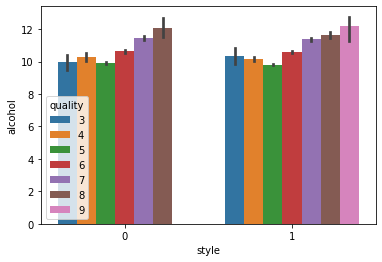

In [56]:

import seaborn as sns
import matplotlib.pyplot as plt
arquivo.head()
%matplotlib inline
sns.barplot(x="style", y="alcohol", hue="quality" , data= arquivo)
plt.show()